In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import control

In [19]:
F = 1
V1 = 5
V2 = 10
cin = 1
A = np.array([[-F/V1,0],
              [F/V2,-F/V2]])
B = np.array([F/V1,0])
C1 = np.array([1,0])
C2 = np.array([0,1])
D = np.array([0])
def model(t, c):
    dcdt = A@c + B*cin
    return dcdt
c0 = np.array([0,0])
t_span = [0,60.]
sol = solve_ivp(model, t_span, c0, atol=1e-9, rtol=1e-6)
t = sol.t
c = sol.y.T


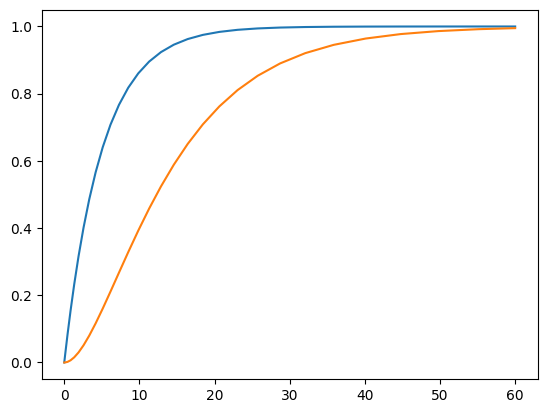

In [20]:
plt.figure()
plt.plot(t, c[:,0], label=r'$c_1$')
plt.plot(t, c[:,1], label=r'$c_2$')

In [21]:
def discrete_model(h, tend):
    # Initial time
    ti = 0
    u_k = cin # does not change in this example
    u_kp1 = cin
    y1_k = 0
    y1_kp1 = 0
    y2_k = 0
    y2_kp1 = 0
    # Save t, x and y in list of lists
    t = [ti]
    y1 = [y1_kp1]
    y2 = [y2_kp1]
    
    sysc1 = control.StateSpace(A,B,C1,D)
    sysd1 = control.sample_system(sysc1,h)
    tf1 = control.ss2tf(sysd1)
    print(f"tf1.num={tf1.den}")
    a0_1 = tf1.den[0][0][1]
    b0_1 = tf1.num[0][0][0]

    sysc2 = control.StateSpace(A,B,C2,D)
    sysd2 = control.sample_system(sysc2,h)
    tf2 = control.ss2tf(sysd2)
    #print(f"tf2 num={tf2.num}")
    a1_2 = tf2.den[0][0][1]
    a0_2 = tf2.den[0][0][2]
    b1_2 = tf2.num[0][0][0]
    b0_2 = tf2.num[0][0][1]

    # Loop for each sample
    while ti<tend:
        ti += h
        y1_kp2 = -a0_1*y1_kp1 + b0_1*u_kp1
        y2_kp2 = b1_2*u_kp1 + b0_2*u_k - a1_2*y2_kp1 - a0_2*y2_k
        t.append(ti)
        y1.append(y1_kp2)
        y2.append(y2_kp2)
        # Shift one sample
        y1_k = y1_kp1
        y1_kp1 = y1_kp2
        y2_k = y2_kp1
        y2_kp1 = y2_kp2
    # Convert lists to np arrays
    t = np.array(t)
    y1 = np.array(y1)
    y2 = np.array(y2)
    return t, y1, y2


tf1.num=[[array([ 1.        , -1.72356817,  0.74081822])]]


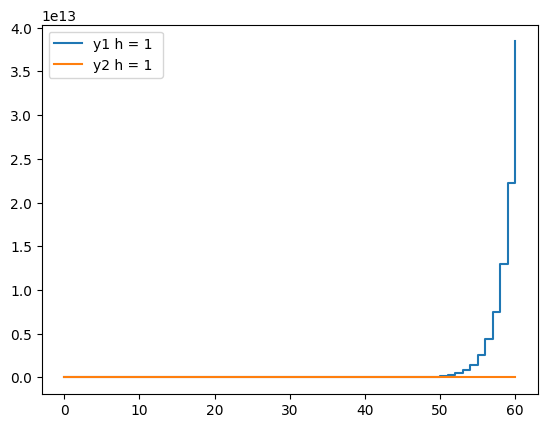

In [22]:
for h in [1]:
    t, y1, y2 = discrete_model(h, 60)
    plt.step(t, y1, where='post', label=f'y1 {h = } ')
    plt.step(t, y2, where='post', label=f'y2 {h = } ')
    plt.legend()